<a href="https://colab.research.google.com/github/maarut001/aiml/blob/utaiml/INN_Learner_Notebook_Full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [ ]:
%pip install tensorflow pandas matplotlib seaborn scikit-learn sklearn-pandas -q --user

In [ ]:
!pip install tensorflow==2.16.2 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.26 pandas==2.1.4 imbalanced-learn==0.10.1 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 545.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are ins

## Importing necessary libraries

In [65]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [66]:
ds = pd.read_csv("Churn.csv")

## Data Overview

In [67]:
ds.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
ds.tail(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Exploratory Data Analysis

In [69]:
#Lets check info of the data
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


No missing data,

*    10000 records , 13 columns
*   3 columns of type object - non numeric columns - Surname, Geography, Gender



In [70]:
#Summary Statistics
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [71]:
### Checking for unique values for each of the column
for col in ds.columns:
    print(col,ds[col].nunique())

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


In [72]:
#check for missing values in the data
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [56]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
CreditScore,460
Age,70
Tenure,11
...,...
Surname_Zuyev,2
Surname_Zuyeva,2
Geography_Germany,2
Geography_Spain,2


## Dropping RowNumber,CustomerId,Surname as they are unique

In [57]:
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

KeyError: "['Surname'] not found in axis"

### Univariate Analysis

In [58]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [59]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

CreditScore

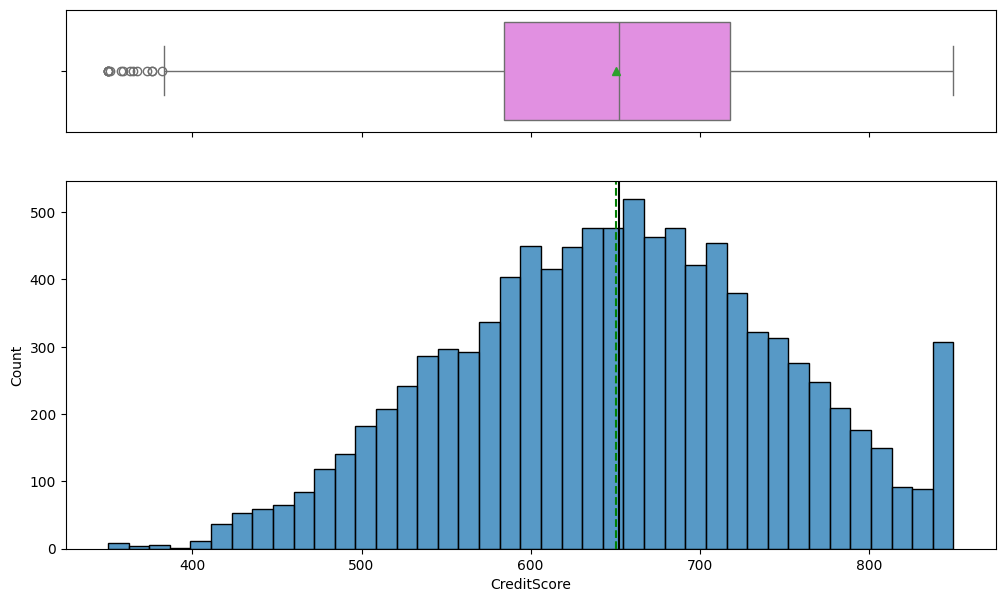

In [60]:
histogram_boxplot(ds,'CreditScore')

Age

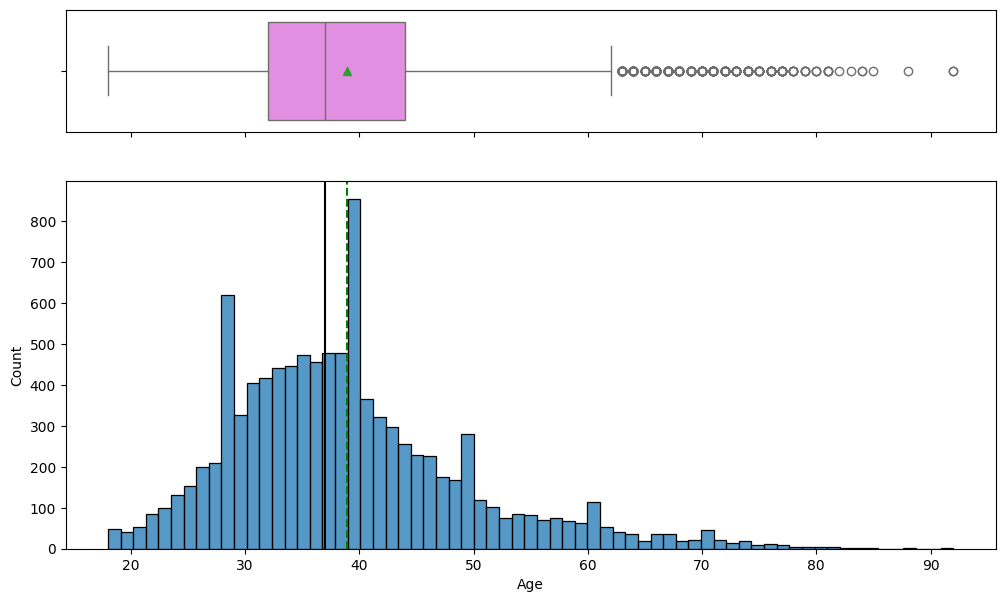

In [61]:
histogram_boxplot(ds,'Age');

#### Observations on Balance


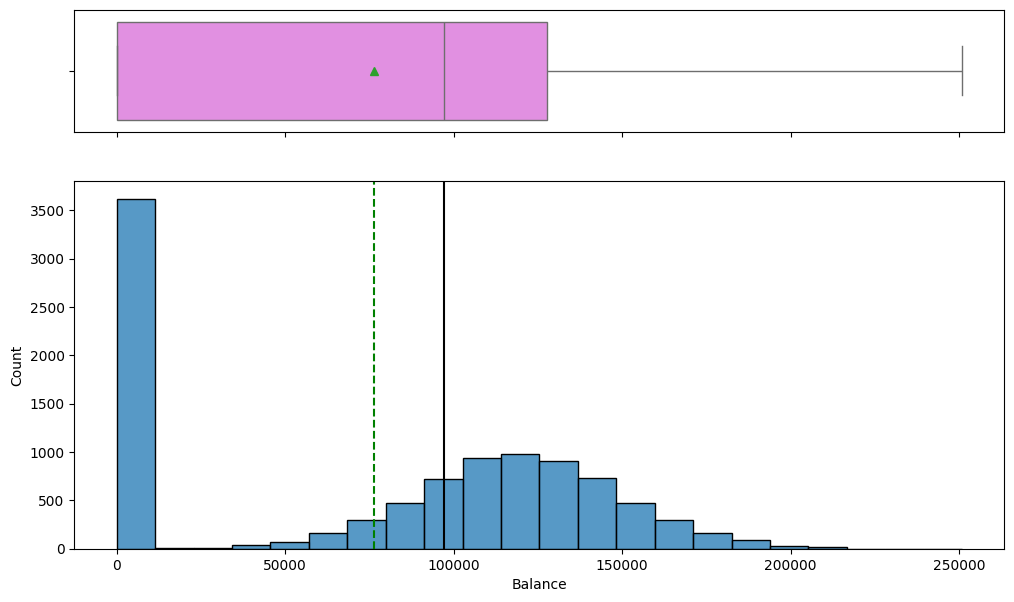

In [62]:
histogram_boxplot(ds,'Balance');

Estimated Salary

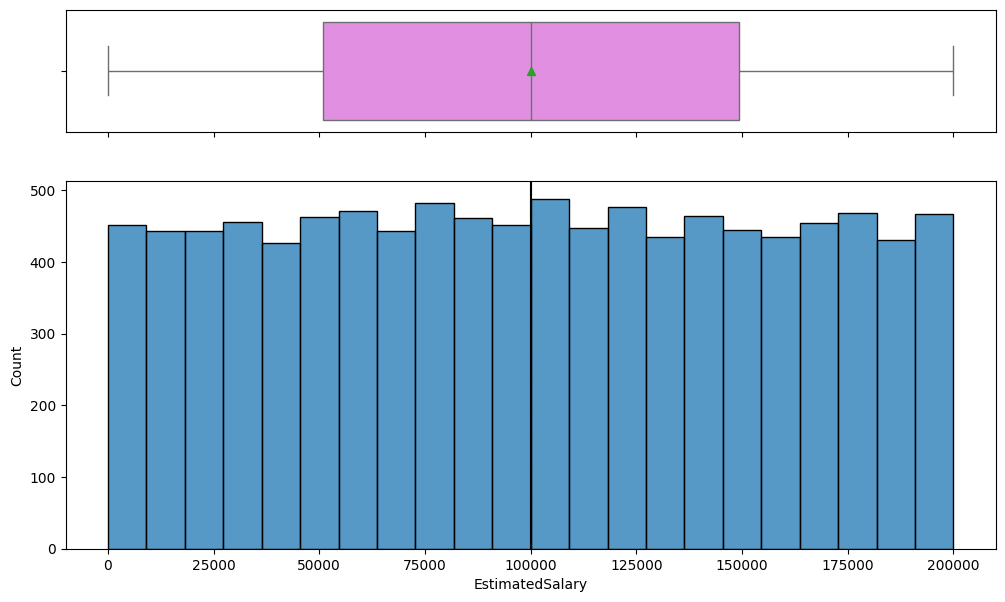

In [63]:
histogram_boxplot(ds,'EstimatedSalary');

#### Observations on Geography

In [64]:
labeled_barplot(ds, "Geography", perc=True)

KeyError: 'Geography'

#### Observations on Exited

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

In [ ]:
histogram_boxplot(ds,'Exited');

#### Observations on Gender

In [ ]:
labeled_barplot(ds, "Gender", perc=True)

#### Observations on Tenure

In [ ]:
labeled_barplot(ds, "Tenure", perc=True)

#### Observations on Number of Products

In [ ]:
labeled_barplot(ds, "NumOfProducts", perc=True)

#### Observations on Has Credit Card

In [ ]:
labeled_barplot(ds, "HasCrCard", perc=True)

#### Observations on Is Active Member

In [ ]:
labeled_barplot(ds, "IsActiveMember", perc=True)

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
#### Exited Vs Geography

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

#### Exited Vs Gender

In [ ]:
stacked_barplot(ds,"Gender","Exited")

#### Exited Vs Has Credit Card

In [ ]:
stacked_barplot(ds,"HasCrCard","Exited")

#### Exited Vs Is active member

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Exited',x='EstimatedSalary',data=ds)

#### Exited Vs Credit Score

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Exited',x='CreditScore',data=ds)               ## Complete the code to plot the boxplot for Exited and Estimated Salary
plt.show()

#### Exited Vs Age

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Exited',x='Age',data=ds)               ## Complete the code to plot the boxplot for Exited and Estimated Salary
plt.show()

#### Exited Vs Tenure

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Estimated Salary
plt.show()

#### Exited Vs Balance

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Estimated Salary
plt.show()

#### Exited Vs Number of Products

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Estimated Salary
plt.show()

#### Exited Vs Estimated Salary

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Estimated Salary
plt.show()

## Data Preprocessing

### Dummy Variable Creation

In [38]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

### Train-validation-test Split

In [39]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42,stratify=y,shuffle = True)

print("X_large size is {}".format(X_large.shape[0]))

print("X_test size is {}".format(X_test.shape[0]))

X_large size is 8000
X_test size is 2000


In [40]:
# Splitting the dataset into the Training and Validation set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.20, random_state = 42,stratify=y_large, shuffle = True)

In [41]:
print("X_train size is {}".format(X_train.shape[0]))

print("X_val size is {}".format(X_val.shape[0]))

X_train size is 6400
X_val size is 1600


In [42]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(6400, 2944)
(1600, 2944)
(2000, 2944)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [43]:
## Standardising the train, Val and Test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_val[num_cols]=scaler.transform(X_val[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])


In [44]:
X_train.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
3006,3007,15720943,0.988678,0.572685,-1.384980,0.610704,-0.909878,1,0,1.566070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5735,5736,15756070,-0.683985,0.477619,-0.355056,-1.237347,0.804346,0,1,0.036348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5652,5653,15800620,0.410474,-0.948376,1.361485,-1.237347,0.804346,0,0,1.745403,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,15736816,1.081604,-0.282911,-1.041672,0.962063,-0.909878,1,1,1.228816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3596,3597,15707199,-0.085130,-0.282911,-1.728288,1.144427,-0.909878,0,0,-0.764748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# Categorical encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [46]:
y_train[:5]

array([1, 0, 0, 0, 0])

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-Recall score important


**Let's create a function for plotting the confusion matrix**

In [47]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [48]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Model 0 Neural Network with SGD Optimizer

In [55]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

Let's build a feed forward neural network with 2 hidden layers and the output layer

In [50]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# Complete the code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [51]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [52]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [54]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         188,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 190,593 (744.50 KB)

 Trainable params: 190,593 (744.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Fitting the ANN

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,    ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=100,    ## Complete the code to specify the number of epochs
    verbose=1
)

Epoch 1/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 354780938240.0000 - recall: 0.0177 - val_loss: 0.6723 - val_recall: 0.0000e+00
Epoch 2/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6677 - recall: 0.0000e+00 - val_loss: 0.6538 - val_recall: 0.0000e+00
Epoch 3/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6497 - recall: 0.0000e+00 - val_loss: 0.6375 - val_recall: 0.0000e+00
Epoch 4/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6340 - recall: 0.0000e+00 - val_loss: 0.6232 - val_recall: 0.0000e+00
Epoch 5/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6200 - recall: 0.0000e+00 - val_loss: 0.6105 - val_recall: 0.0000e+00
Epoch 6/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6077 - recall: 0.0000e+00 - val_loss: 0.5993 - val_recall: 0.0000e+00
Epoch 7/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5969 - recall: 0.0000e+00 - val_loss: 0.5893 - val_recall: 0.0000e+00
Epoch 8/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0

**Loss function**

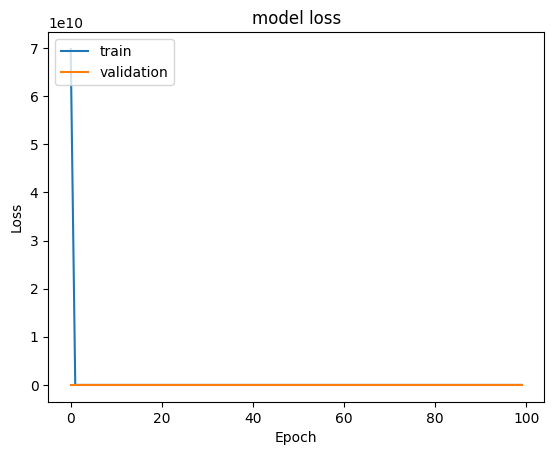

In [21]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

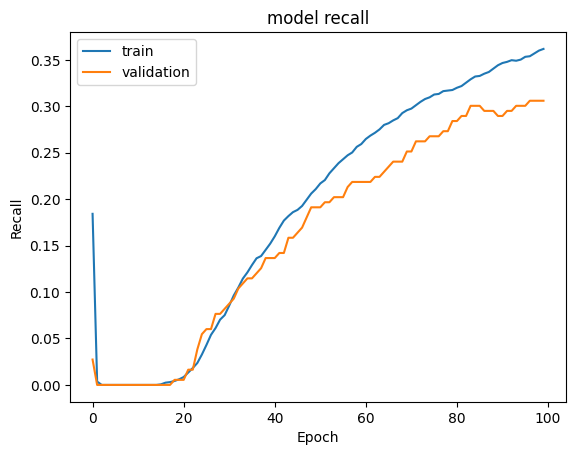

In [177]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [178]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
#y_train_pred

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [180]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
#y_val_pred

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [2]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

NameError: name 'recall_score' is not defined

**Classification report**

In [1]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

NameError: name 'classification_report' is not defined

In [ ]:
#classification report
cr=classification_report(_____, _____)    ## Complete the code to check the model's performance on the validation set
print(cr)

**Confusion matrix**

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

In [ ]:
make_confusion_matrix(_____, _____)

## Model Performance Improvement

Since this is a binary classification task, we will be minimizing the **binary_crossentropy** and we can choose one optimizer out of
1.   SGD
2.   RMSprop
3.   Adam
4.   Adadelta
5.   Adagrad
6.   Adamax
7.   Nadam
8.   Ftrl

let's try **Adam** optimizer with **recall** first as the metric and see the model's summary.

Model Improvement Criteria
1. Recall score is important here as this is customer loss problem. We want to make sure that customers who have left the bank are identified properly rather than customers who have stayed so that. Ultimate goal of model is to improve prediction criteria of customers who will leave the bank so that steps can be taken to retain them.
2. Recall measures the proportion of actual churners that are correctly identified by the model. A high recall means that most of the customers who are at risk of churning are detected. If the recall is low, the model fails to identify many potential churners, leading to missed opportunities to intervene and retain those customers. In other words, low recall means many false negatives, which is costly in churn prediction.
3. We want high recall.
4. Precision also needs to be taken into account to minimize false positives. Model which has high recall score but poor/low precision implies it did not identify customers correctly who were likely to churn leading to unnecessary retention effort by bank. However, in many churn prediction scenarios, businesses might prefer to err on the side of caution (high recall), even if it means handling some false positives.

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(___,activation='___',input_dim = X_train.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(___,activation='___'))
#Complete the code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(___, activation = 'sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.____()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='___',optimizer=optimizer,metrics=[metric])

In [73]:
model_1.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.Adam, metrics=['recall'])
#optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
#model_0.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

model_1.summary()
metric=keras.metrics.Recall()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

From the above summary, we can see that this architecture will train a total of **2881** parameters i.e. weights and biases in the network.

**Training the Model**

In [74]:
history_1 = model_1.fit(
    X_train, y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=100,    ## Trying with 100 epochs first
    verbose=1
)

Epoch 1/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4880 - recall: 0.0910 - val_loss: 0.4019 - val_recall: 0.2514
Epoch 2/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3760 - recall: 0.3654 - val_loss: 0.3892 - val_recall: 0.3443
Epoch 3/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3530 - recall: 0.4472 - val_loss: 0.3871 - val_recall: 0.3552
Epoch 4/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3440 - recall: 0.4558 - val_loss: 0.3858 - val_recall: 0.3661
Epoch 5/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3390 - recall: 0.4648 - val_loss: 0.3844 - val_recall: 0.3607
Epoch 6/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3352 - recall: 0.4811 - val_loss: 0.3830 - val_recall: 0.3661
Epoch 7/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3323 - recall: 0.4799 - val_loss: 0.3817 - val_recall: 0.3716
Epoch 8/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3299 - recall: 0.4824 - val_loss: 0.3816 - val_recall: 0.3661


Loss function

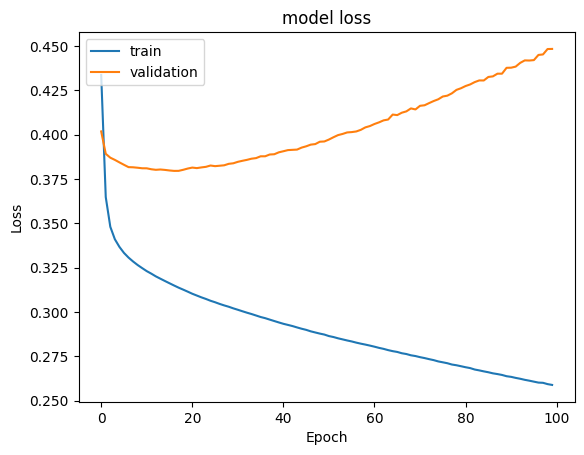

In [75]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Recall

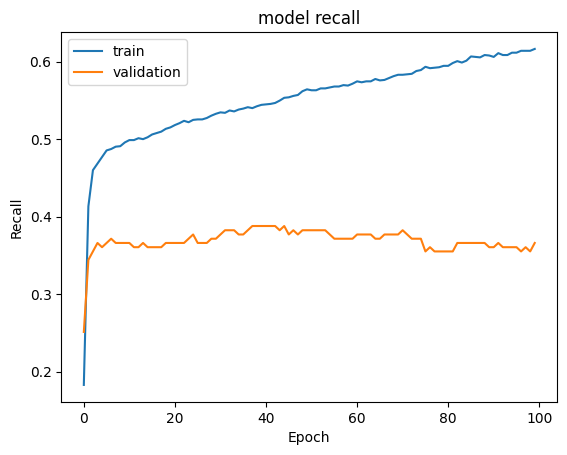

In [76]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [79]:
#Predicting the results using best as a threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
#y_train_pred

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [80]:
#Predicting the results using best as a threshold
y_val_pred = model_1.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
#y_val_pred

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
model_name = "NN with Adam and Dropout"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Observations:**

- The training accuracy is fluctuating but overall it is increasing with the increase in the epochs.
- The validation accuracy is constant between ~10 to 100 epochs.
- The model is giving poor recall. After 100 epochs, the recall of the model on the training data is about 0.6 and the validation recall is 0.4%.
- The validation accuracy is far away from from training accuracy. This indicates that the model is giving a poor performance.

### Neural Network with Adam Optimizer and Dropout

In [81]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [83]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu'))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(8,activation='relu'))
# Complete the code to add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.1))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(4,activation='relu'))
# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [84]:
model_2.compile(loss = 'binary_crossentropy', optimizer=keras.optimizers.SGD(), metrics=['recall'])
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,  ##Complete the code to specify the batch size.
    epochs=100, ##Complete the code to specify the # of epochs.
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5858 - recall: 0.0596 - val_loss: 0.4785 - val_recall: 0.0000e+00
Epoch 2/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4913 - recall: 3.3297e-04 - val_loss: 0.4668 - val_recall: 0.0000e+00
Epoch 3/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4763 - recall: 0.0012 - val_loss: 0.4588 - val_recall: 0.0000e+00
Epoch 4/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4721 - recall: 0.0031 - val_loss: 0.4536 - val_recall: 0.0000e+00
Epoch 5/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4627 - recall: 0.0058 - val_loss: 0.4494 - val_recall: 0.0055
Epoch 6/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4568 - recall: 0.0224 - val_loss: 0.4452 - val_recall: 0.0164
Epoch 7/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4493 - recall: 0.0313 - val_loss: 0.4410 - val_recall: 0.0492
Epoch 8/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4501 - recall: 0.0589 - val_loss: 0.4374 -

Loss function

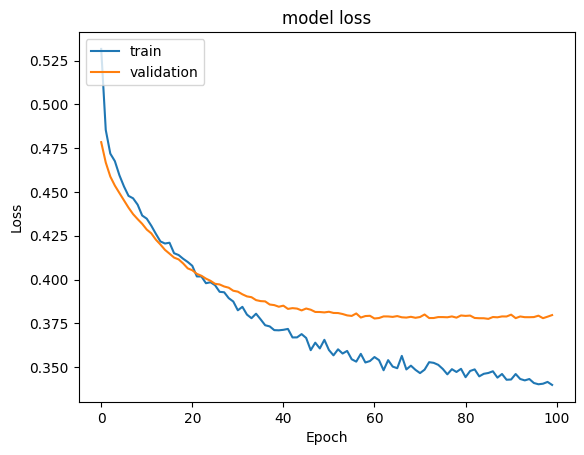

In [86]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

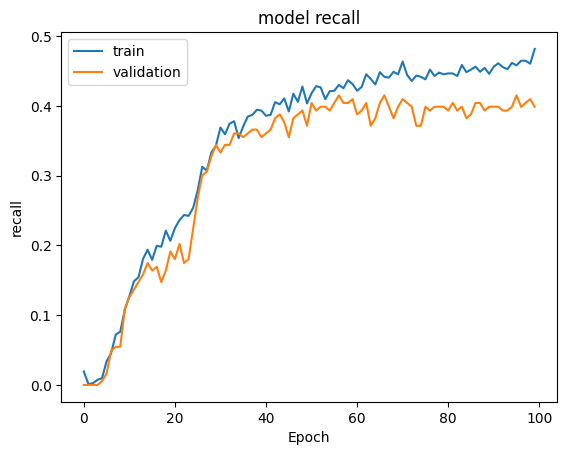

In [87]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [88]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
#y_train_pred

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [89]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
#y_val_pred

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [90]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

Classification report

In [91]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6450
           1       0.80      0.48      0.60      1650

    accuracy                           0.87      8100
   macro avg       0.84      0.73      0.76      8100
weighted avg       0.86      0.87      0.86      8100



In [93]:
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       717
           1       0.68      0.40      0.50       183

    accuracy                           0.84       900
   macro avg       0.77      0.68      0.70       900
weighted avg       0.82      0.84      0.82       900



**Confusion matrix**

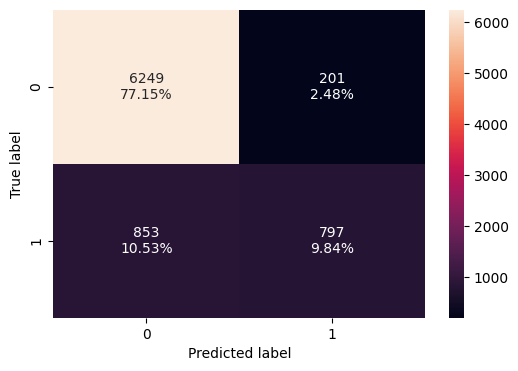

In [94]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

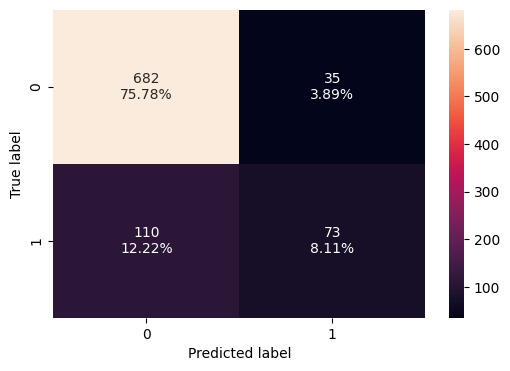

In [96]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [97]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (12900, 11)
After UpSampling, the shape of train_y: (12900,) 



Let's build a model with the balanced dataset

In [98]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [102]:
#Initializing the model
model_3 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [100]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [103]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [104]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6991 - recall: 0.8212 - val_loss: 0.7141 - val_recall: 0.8251
Epoch 2/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6946 - recall: 0.7966 - val_loss: 0.7041 - val_recall: 0.7978
Epoch 3/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6901 - recall: 0.7654 - val_loss: 0.6940 - val_recall: 0.7213
Epoch 4/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6852 - recall: 0.7157 - val_loss: 0.6835 - val_recall: 0.6612
Epoch 5/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6801 - recall: 0.6841 - val_loss: 0.6739 - val_recall: 0.6339
Epoch 6/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6751 - recall: 0.6614 - val_loss: 0.6654 - val_recall: 0.6066
Epoch 7/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6704 - recall: 0.6513 - val_loss: 0.6578 - val_recall: 0.6120
Epoch 8/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6659 - recall: 0.6458 - val_loss: 0.6509 - val_recall: 0.6066


**Loss function**

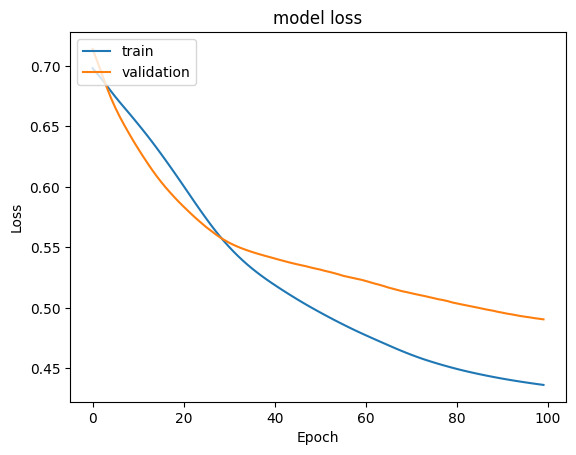

In [106]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

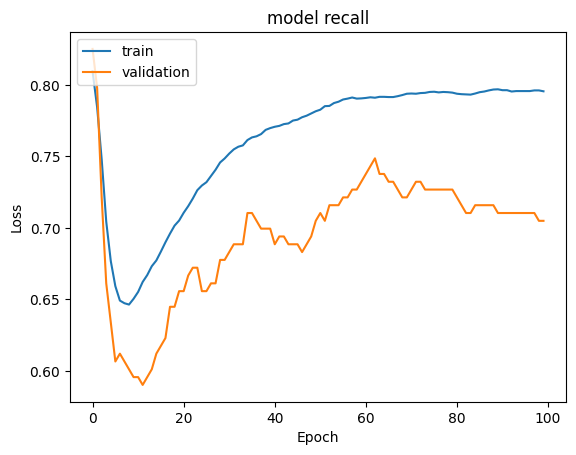

In [107]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [108]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
#y_train_pred

404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

In [109]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
#y_val_pred

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [110]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

Classification report

In [111]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      6450
           1       0.79      0.79      0.79      6450

    accuracy                           0.79     12900
   macro avg       0.79      0.79      0.79     12900
weighted avg       0.79      0.79      0.79     12900



In [113]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       717
           1       0.45      0.70      0.55       183

    accuracy                           0.76       900
   macro avg       0.68      0.74      0.69       900
weighted avg       0.82      0.76      0.78       900



Confusion matrix

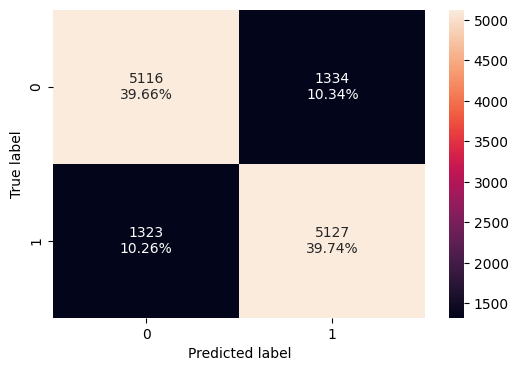

In [114]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

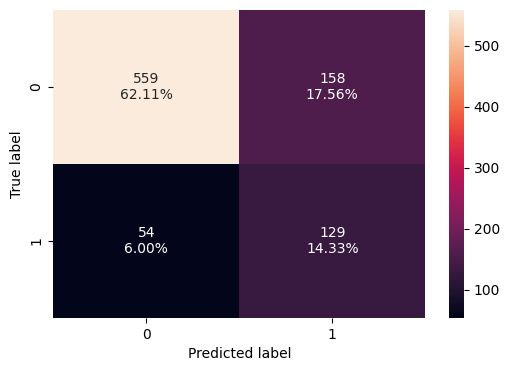

In [115]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [116]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [117]:
#Initializing the model
model_4 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(16,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [118]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [120]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [121]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=100,  ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.6050 - recall: 0.7501 - val_loss: 0.5350 - val_recall: 0.7486
Epoch 2/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4479 - recall: 0.8061 - val_loss: 0.4999 - val_recall: 0.7268
Epoch 3/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4307 - recall: 0.8000 - val_loss: 0.4877 - val_recall: 0.6995
Epoch 4/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4221 - recall: 0.7997 - val_loss: 0.4839 - val_recall: 0.6885
Epoch 5/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4160 - recall: 0.8010 - val_loss: 0.4808 - val_recall: 0.6831
Epoch 6/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4114 - recall: 0.8037 - val_loss: 0.4826 - val_recall: 0.6776
Epoch 7/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4078 - recall: 0.8054 - val_loss: 0.4831 - val_recall: 0.6776
Epoch 8/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4047 - recall: 0.8060 - val_loss: 0.4857 - val_recall: 0.6776


**Loss function**

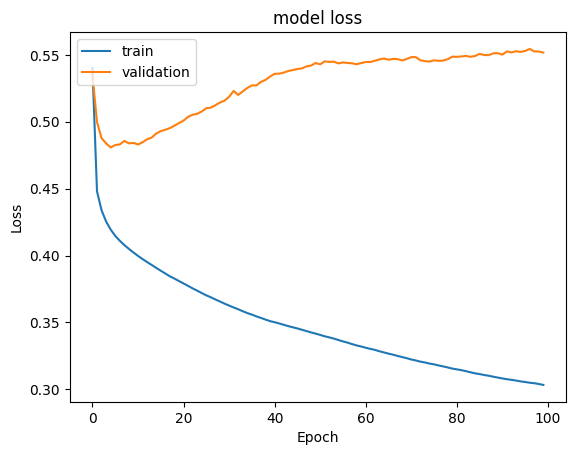

In [123]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

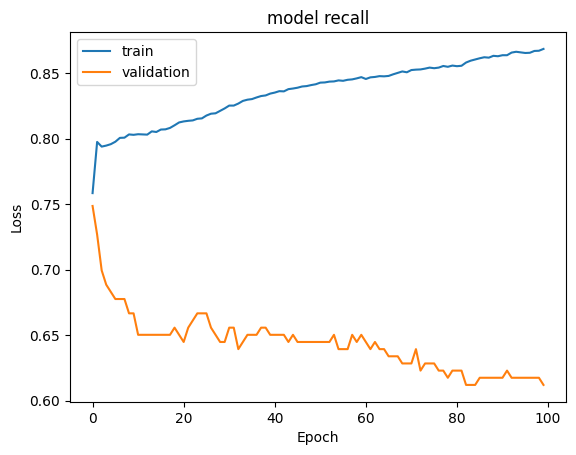

In [124]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [125]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
#y_train_pred

404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

In [126]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
#y_val_pred

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

In [127]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [128]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      6450
           1       0.85      0.90      0.88      6450

    accuracy                           0.87     12900
   macro avg       0.87      0.87      0.87     12900
weighted avg       0.87      0.87      0.87     12900



In [130]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       717
           1       0.43      0.61      0.51       183

    accuracy                           0.76       900
   macro avg       0.66      0.70      0.67       900
weighted avg       0.80      0.76      0.77       900



**Confusion matrix**

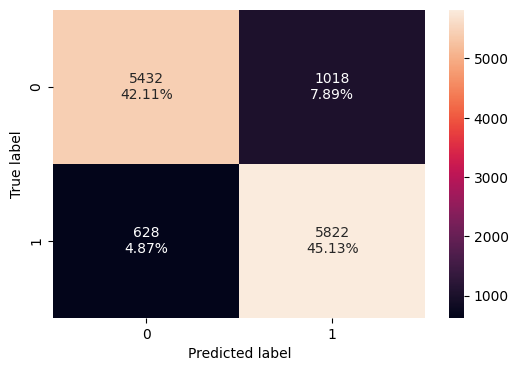

In [131]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

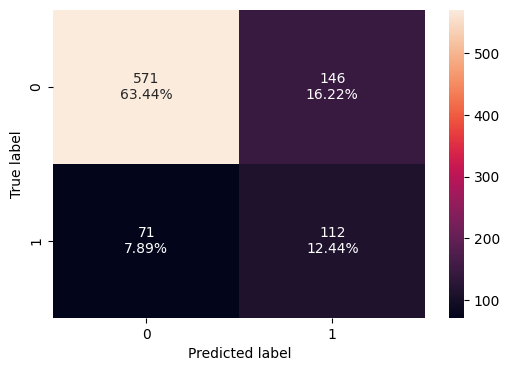

In [132]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [133]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [134]:
#Initializing the model
model_5 = Sequential()
# Complete the code to add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add dropout rate
model_5.add(Dropout(0.1))
# Complete the code to add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(16,activation='relu'))
# Complete the code to add dropout rate.
model_5.add(Dropout(0.1))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [138]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [139]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [140]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.6046 - recall_1: 0.6832 - val_loss: 0.5229 - val_recall_1: 0.7486
Epoch 2/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4775 - recall_1: 0.7794 - val_loss: 0.4941 - val_recall_1: 0.7213
Epoch 3/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4567 - recall_1: 0.7715 - val_loss: 0.4806 - val_recall_1: 0.6995
Epoch 4/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4481 - recall_1: 0.7742 - val_loss: 0.4753 - val_recall_1: 0.6995
Epoch 5/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4433 - recall_1: 0.7716 - val_loss: 0.4786 - val_recall_1: 0.6831
Epoch 6/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4349 - recall_1: 0.7727 - val_loss: 0.4718 - val_recall_1: 0.6776
Epoch 7/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4385 - recall_1: 0.7739 - val_loss: 0.4713 - val_recall_1: 0.6831
Epoch 8/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4312 - recall_1: 0.7716 - val_loss

**Loss Function**

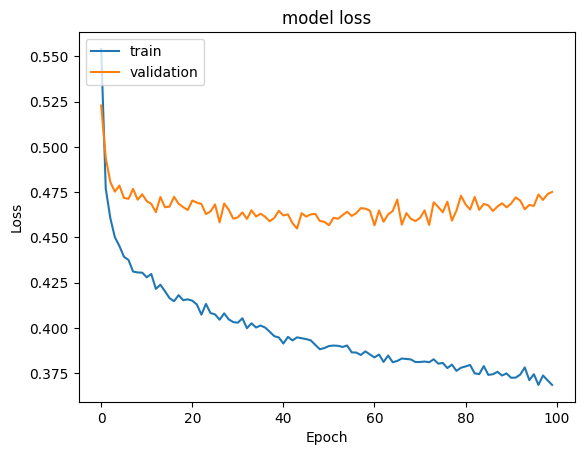

In [142]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'recall_1', 'val_loss', 'val_recall_1'])


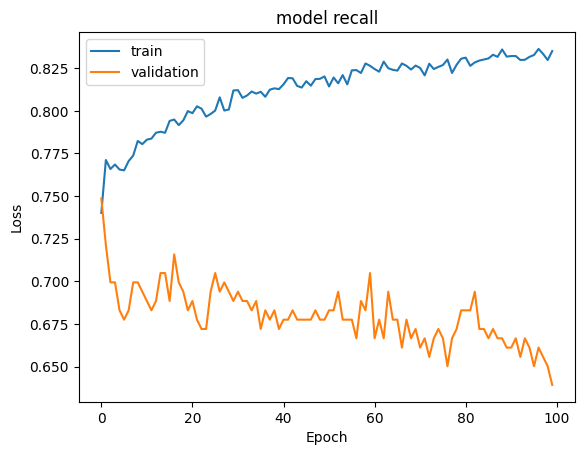

In [154]:
#Plotting Train recall vs Validation recall
print(history_5.history.keys())
plt.plot(history_5.history['recall_1'])
plt.plot(history_5.history['val_recall_1'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [155]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
#y_train_pred

404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [168]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
#y_val_pred

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [156]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [157]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      6450
           1       0.85      0.86      0.85      6450

    accuracy                           0.85     12900
   macro avg       0.85      0.85      0.85     12900
weighted avg       0.85      0.85      0.85     12900



In [158]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       717
           1       0.49      0.64      0.56       183

    accuracy                           0.79       900
   macro avg       0.70      0.74      0.71       900
weighted avg       0.82      0.79      0.80       900



**Confusion matrix**

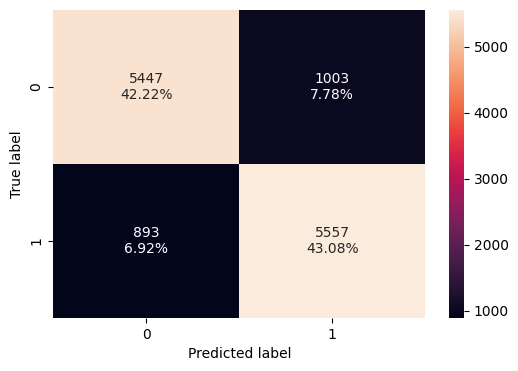

In [159]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

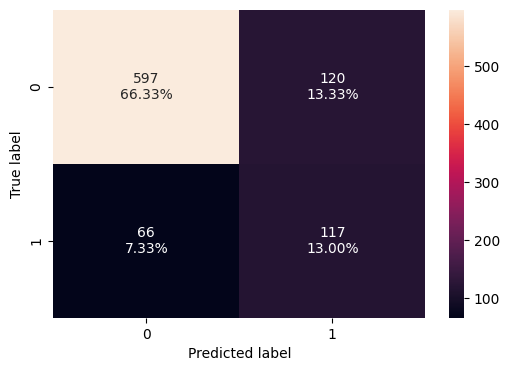

In [160]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

## Model Performance Comparison and Final Model Selection

In [161]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with Adam & Dropout,0.483030
NN with SMOTE & SGD,0.794884
NN with SMOTE & Adam,0.902636
"NN with SMOTE,Adam & Dropout",0.861550


In [162]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with Adam & Dropout,0.398907
NN with SMOTE & SGD,0.704918
NN with SMOTE & Adam,0.612022
"NN with SMOTE,Adam & Dropout",0.639344


In [163]:
train_metric_df - valid_metric_df

,recall
NN with Adam & Dropout,0.084123
NN with SMOTE & SGD,0.089966
NN with SMOTE & Adam,0.290614
"NN with SMOTE,Adam & Dropout",0.222206


In [ ]:
final_model = model_4
train_metric_df - valid_metric_df

In [166]:
y_test_pred = Y_test.predict(X_test)    ## Complete the code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

NameError: name 'Y_test' is not defined

In [167]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

NameError: name 'y_test_pred' is not defined

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___